## Overview
- This notebook will allow you to probe the representations of a deep, convolutional neural network (AlexNet).
- Specifically, you can upload images, pass them through your deep neural network, and then evaluate how similar the images are in different "feature spaces" of the model (from early convolutional layers, to the fully connected layers, and finally at the output layer.

## Instructions
- The cells of this notebook are intended to be run in order. To run a cell, place the cursor in the cell and hit "Shift + Enter".

## General Setup, Importing Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
%config InlineBackend.figure_format='retina'
# %matplotlib notebook
%matplotlib inline
sns.set(rc={'figure.figsize':(15.7,8.27)})
np.set_printoptions(suppress=True)

In [3]:
from lib import *

### download 3 demo images

In [5]:
!chmod u+x ./images/download.sh
!./images/download.sh

/home/jovyan/images 100%[===================>]  96.21K  --.-KB/s    in 0.04s   
/home/jovyan/images 100%[===================>] 116.92K  --.-KB/s    in 0.03s   
/home/jovyan/images 100%[===================>] 145.40K  --.-KB/s    in 0.06s   


## Step 1 - upload Images
- Here you can upload any images you plan to use. Images will be placed in the "images" folder.

In [4]:
show_upload()

## Step 2 - specify image pairs
- Here we need to tell the program which pairs of images we want to compare.
- The program assumes each image is in the images folder.
- If the program fails to find your images, double check your filename (case sensitive!)

In [14]:
# this command will list all of the .jpg images in your folder
!ls images/*.jpg

images/BaldBear.jpg		  images/DiCaprio_Positive.jpg
images/DiCaprio_Anchor.jpg	  images/Gorilla.jpg
images/DiCaprio_HardNegative.jpg  images/BrownBear.jpg


In [7]:
# here we define a list [ ... ]
# with a comma-separated set of "tuples" ( ... )
# that define pairs of images to be compared
# So here "BrownBear.jpg" will be compared to 'BaldBear.jpg', and to 'Gorilla.jpg'
image_pairs = [
    ('BrownBear.jpg', 'BaldBear.jpg'),
    ('BrownBear.jpg', 'Gorilla.jpg')
]

#If we also wanted to compare 'BaldBear.jpg' and 'Gorilla.jpg', we could add a third pair in parentheses
# Don't forget to include comma after each set of parenteses
# image_pairs = [
#     ('BrownBear.jpg', 'BaldBear.jpg'),
#     ('BrownBear.jpg', 'Gorilla.jpg'), <-- notice the comma
#     ('BaldBear.jpg', 'Gorilla.jpg')
# ]

## Step 3 - create a dataset for your image_pairs

In [8]:
dataset = get_dataset(image_pairs)
dataset

Dataset ImageListDataset
    Number of Images: 4
    Compose(
    Resize(size=(224, 224), interpolation=PIL.Image.BILINEAR)
)

## Step4 - visualize image pairs

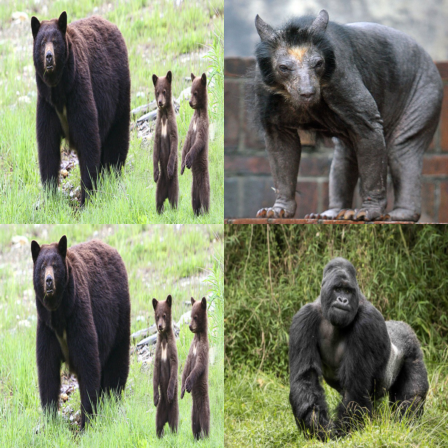

In [9]:
show_grid(dataset)

## Step5 - instantiate a model

In [10]:
# model = models.alexnet_imagenet()
model = models.alexnet(pretrained=True)
model

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

## Step6 - compute image similarity in each model layer

In [13]:
results = compute_similarity(model, dataset)
results.head()

,pair_num,image1,image2,layer_num,layer_name,layer_type,r
0,0,BrownBear.jpg,BaldBear.jpg,0,features.0,Conv2d,0.123220
1,0,BrownBear.jpg,BaldBear.jpg,1,features.1,ReLU,0.123220
2,0,BrownBear.jpg,BaldBear.jpg,2,features.2,MaxPool2d,0.167680
3,0,BrownBear.jpg,BaldBear.jpg,3,features.3,Conv2d,0.148025
4,0,BrownBear.jpg,BaldBear.jpg,4,features.4,ReLU,0.148025


## Step7 - plot results

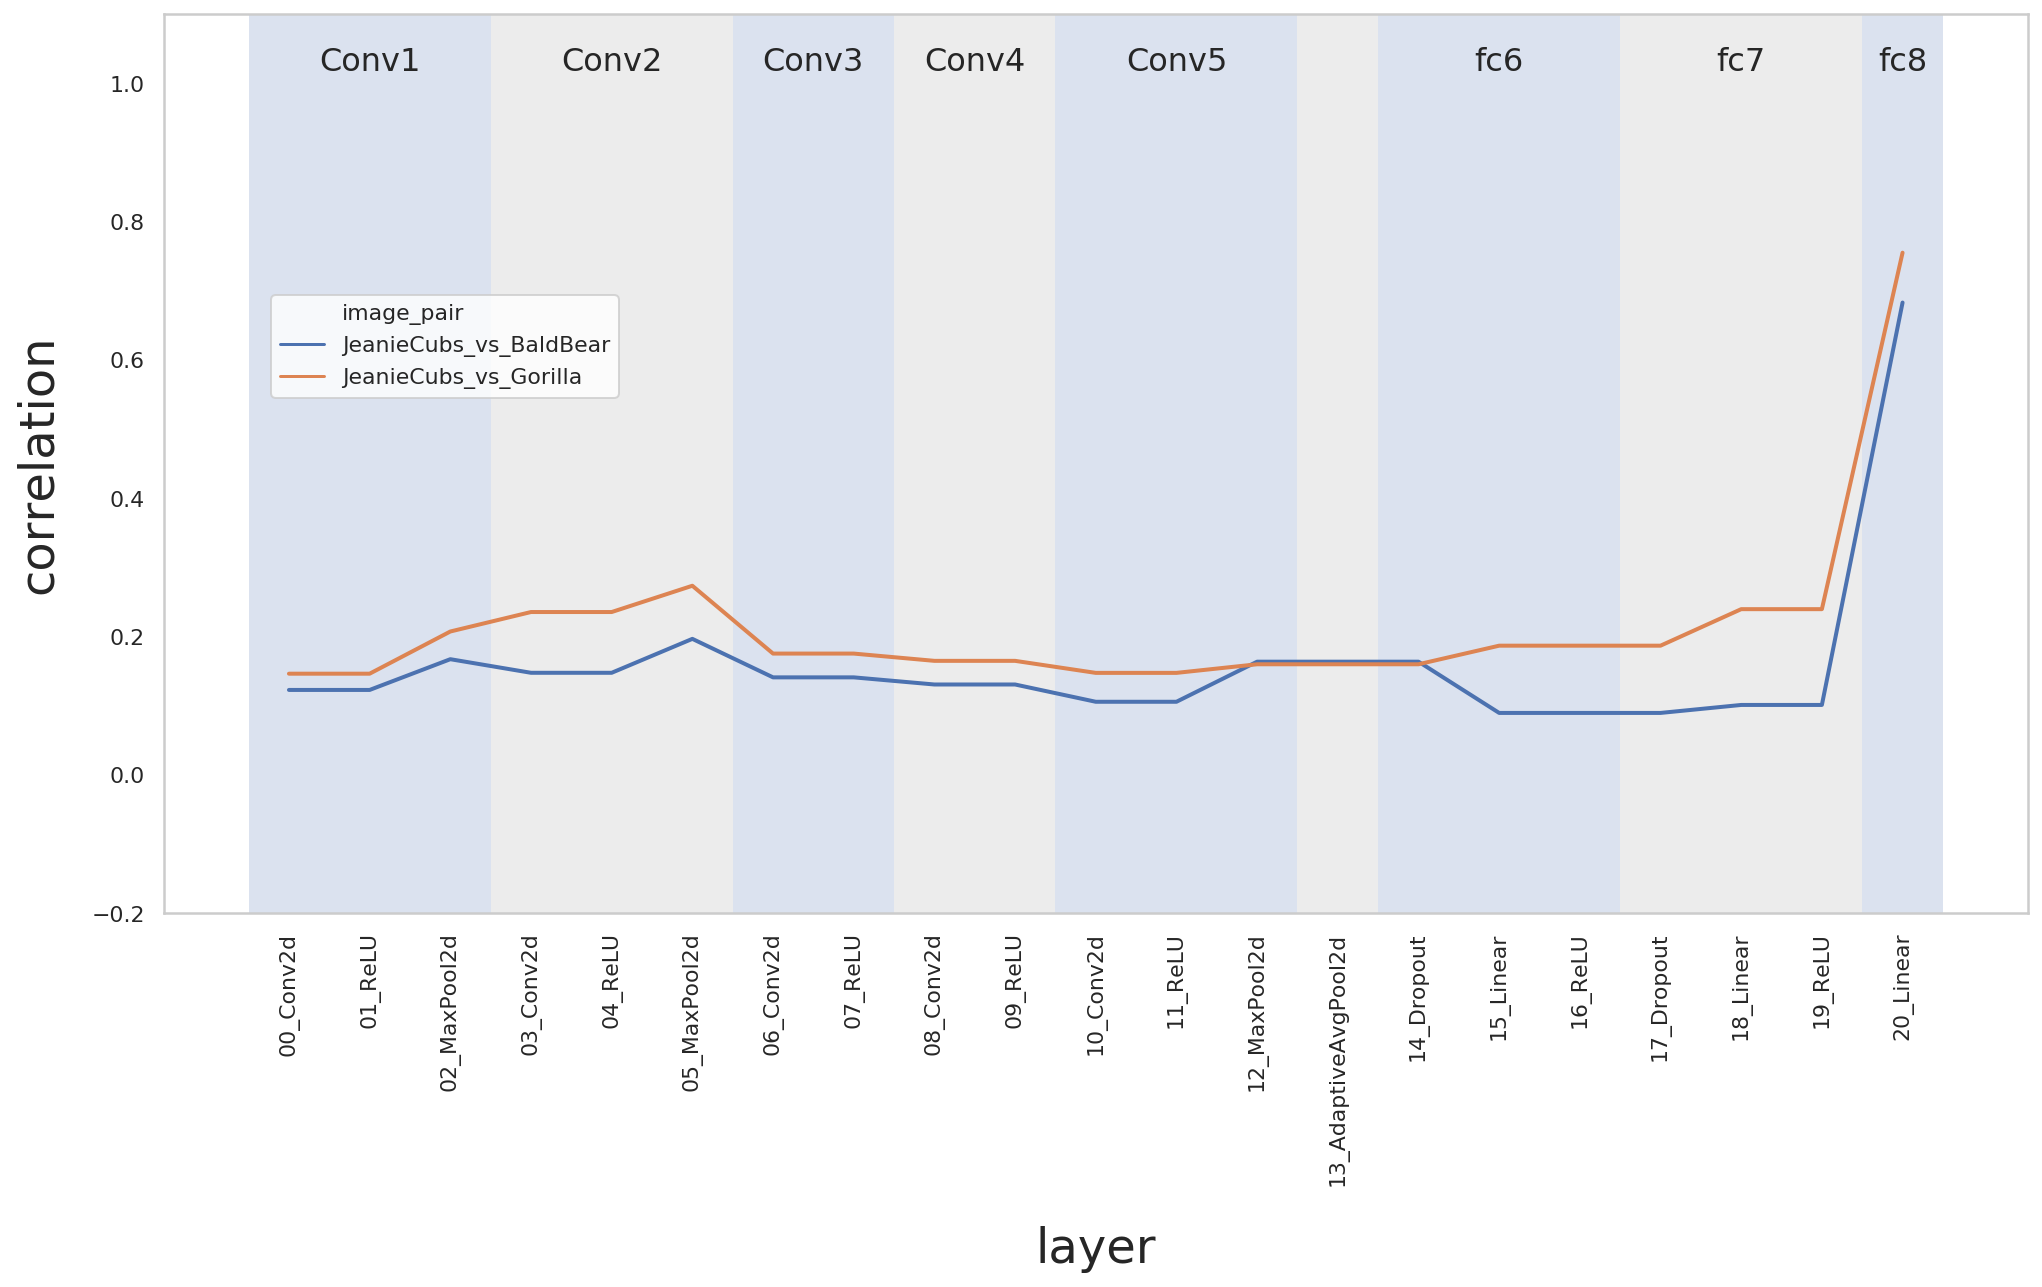

In [27]:
plot(results);

## Step8 - document your observations and conclusions

### observations
The BrownBear is more similar to the Gorilla than to the BaldBear in most model layers.

### interpretation
The model appears to "see" the BrownBear as more similar to a Gorilla than to the BaldBear.

### discussion: 
***Does this agree with your subjective impression?***  
Actually, I found it hard to to decide. They looked about equal to me, but that does jibe with the fact that the differneces in similarity (between orange and blue lines in the figure) were small.

***What conclusions would you draw about the network based on these results?***  
It does look like the network shows a bit of a texture bias (finding the gorilla more similar to the bear because of it's fur, even though the pose of the BaldBear is arguably more similar to the pose of the BrownBear).

### Step9 - Export your report TWICE, and upload to the course website
- Download as -> Notebook (.ipynb) -> LastName_FirstName_Project1.ipynb
- Download as -> PDF -> LastName_FirstName_Project1.pdf
- upload your files, including images, to the course website